In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

df = pd.read_csv("./datasets/fixed_battery_log_2.csv")
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()

In [8]:
def Frequency_Distribution(data, bins, class_width=None):
    data = np.asarray(data)

#     bins = np.arange(0, 110, 10)
    hist = np.histogram(data, bins)[0]
    cumsum = hist.cumsum()

    return pd.DataFrame({'階級値': (bins[1:] + bins[:-1]) / 2,
                         '度数': hist,
                         '累積度数': cumsum,
                         '相対度数': hist / cumsum[-1],
                         '累積相対度数': cumsum / cumsum[-1]},
                        index=pd.Index([f'{bins[i]}以上{bins[i+1]}未満'
                                        for i in range(hist.size)],
                                       name='階級'))

In [9]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    ax_histx.tick_params(axis="x", labelbottom=False) #x軸ラベル無し
    ax_histy.tick_params(axis="y", labelleft=False) #y軸ラベル無し
    ax.scatter(x, y) #散布図のプロット
    
    binwidth = 0.25 #bin(ビン)は、ヒストグラムにおいてバー1本の事。ここでbinの値幅を定義。
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y))) #xとyの最大値を定義
    lim = (int(xymax/binwidth) + 1) * binwidth #ヒストグラムの横軸を定義

    bins = np.arange(-lim, lim + binwidth, binwidth) #binの個数を定義
    ax_histx.hist(x, bins=bins) #xについてのヒストグラム作成
    ax_histy.hist(y, bins=bins, orientation='horizontal')

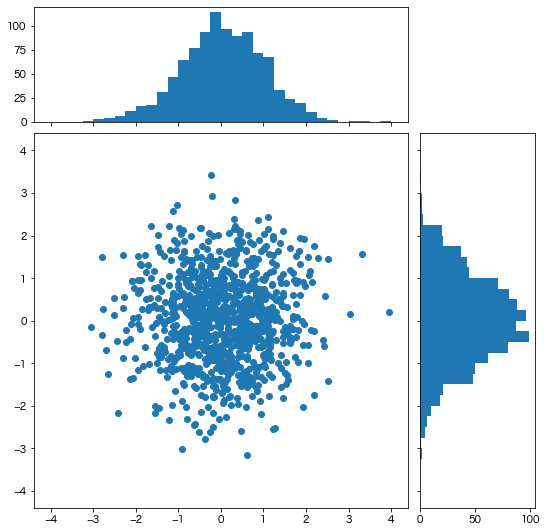

In [10]:
np.random.seed(1) #計算の再現性を担保するため、初期乱数を1に設定
x = np.random.randn(1000) #乱数を1000個生成
y = np.random.randn(1000) #乱数を1000個生成

left, width = 0.1, 0.65 #散布図の左余白と、幅を定義
bottom, height = 0.1, 0.65 #散布図の下余白と、高さを定義
spacing = 0.02 #散布図とヒストグラムの間隔

fig_scatter = [left, bottom, width, height] #散布図の定義
fig_histx = [left, bottom + height + spacing, width, 0.2] #上のヒストグラムの定義
fig_histy = [left + width + spacing, bottom, 0.2, height] #右のヒストグラムの定義

fig = plt.figure(figsize=(8, 8)) #描写領域を正方形で生成

ax = fig.add_axes(fig_scatter) #図1として散布図領域を生成
ax_histx = fig.add_axes(fig_histx, sharex=ax) #上のヒストグラム領域を生成
ax_histy = fig.add_axes(fig_histy, sharey=ax) #右のヒストグラム領域を生成

#最後にscatter_histでまとめて描写
scatter_hist(x, y, ax, ax_histx, ax_histy)

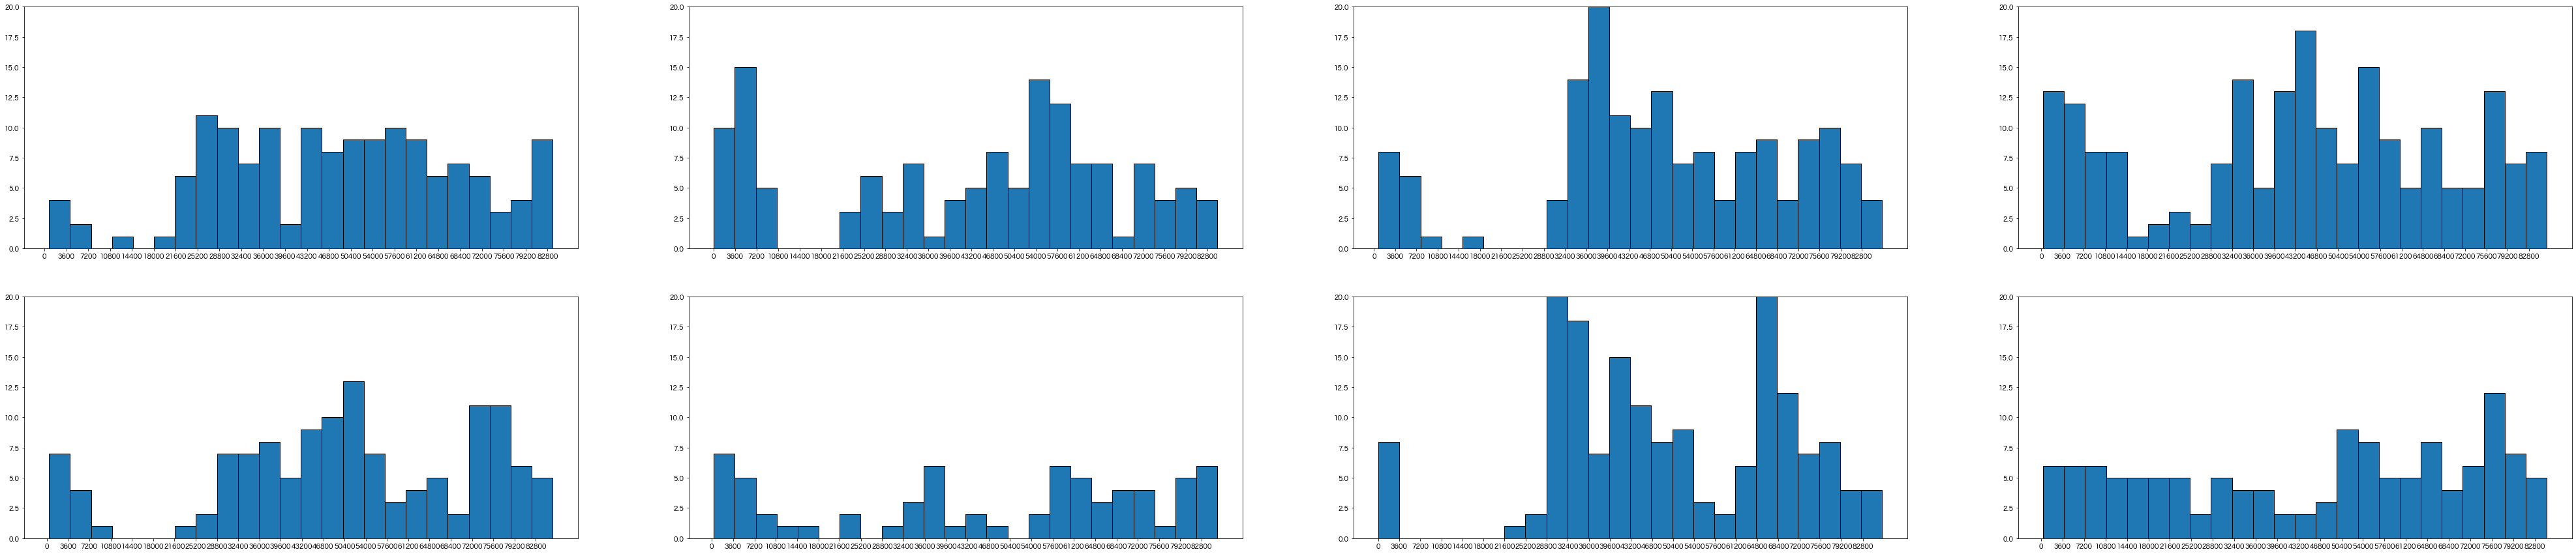

In [2]:
# hist plot - simple
plt.figure(figsize=(70,15))
# fuse_users = [x for x in range(0,8)] 
x_range = np.arange(0,86400,3600)

for i in range(len(users)):
    plt.subplot(2,4,i+1)
    plt.xticks(x_range)
    plt.ylim(0,20)
    plt.hist(df.loc[(df["User"] == users[i]) & 
                    (df["state"] == "ON") & 
                    (df["date"] > dt.datetime(2021,12,1)) & 
                    (df["date"] < dt.datetime(2022,1,31))]["time_to_num"],
#              range=(0,86400),
             bins=24,
             ec="black"
            )
#     user_data.plot.bar(x="階級値",y="度数",width=1,ec="k")
#     plt.savefig("bs_2_results/hist_plot_simple_time.jpg")

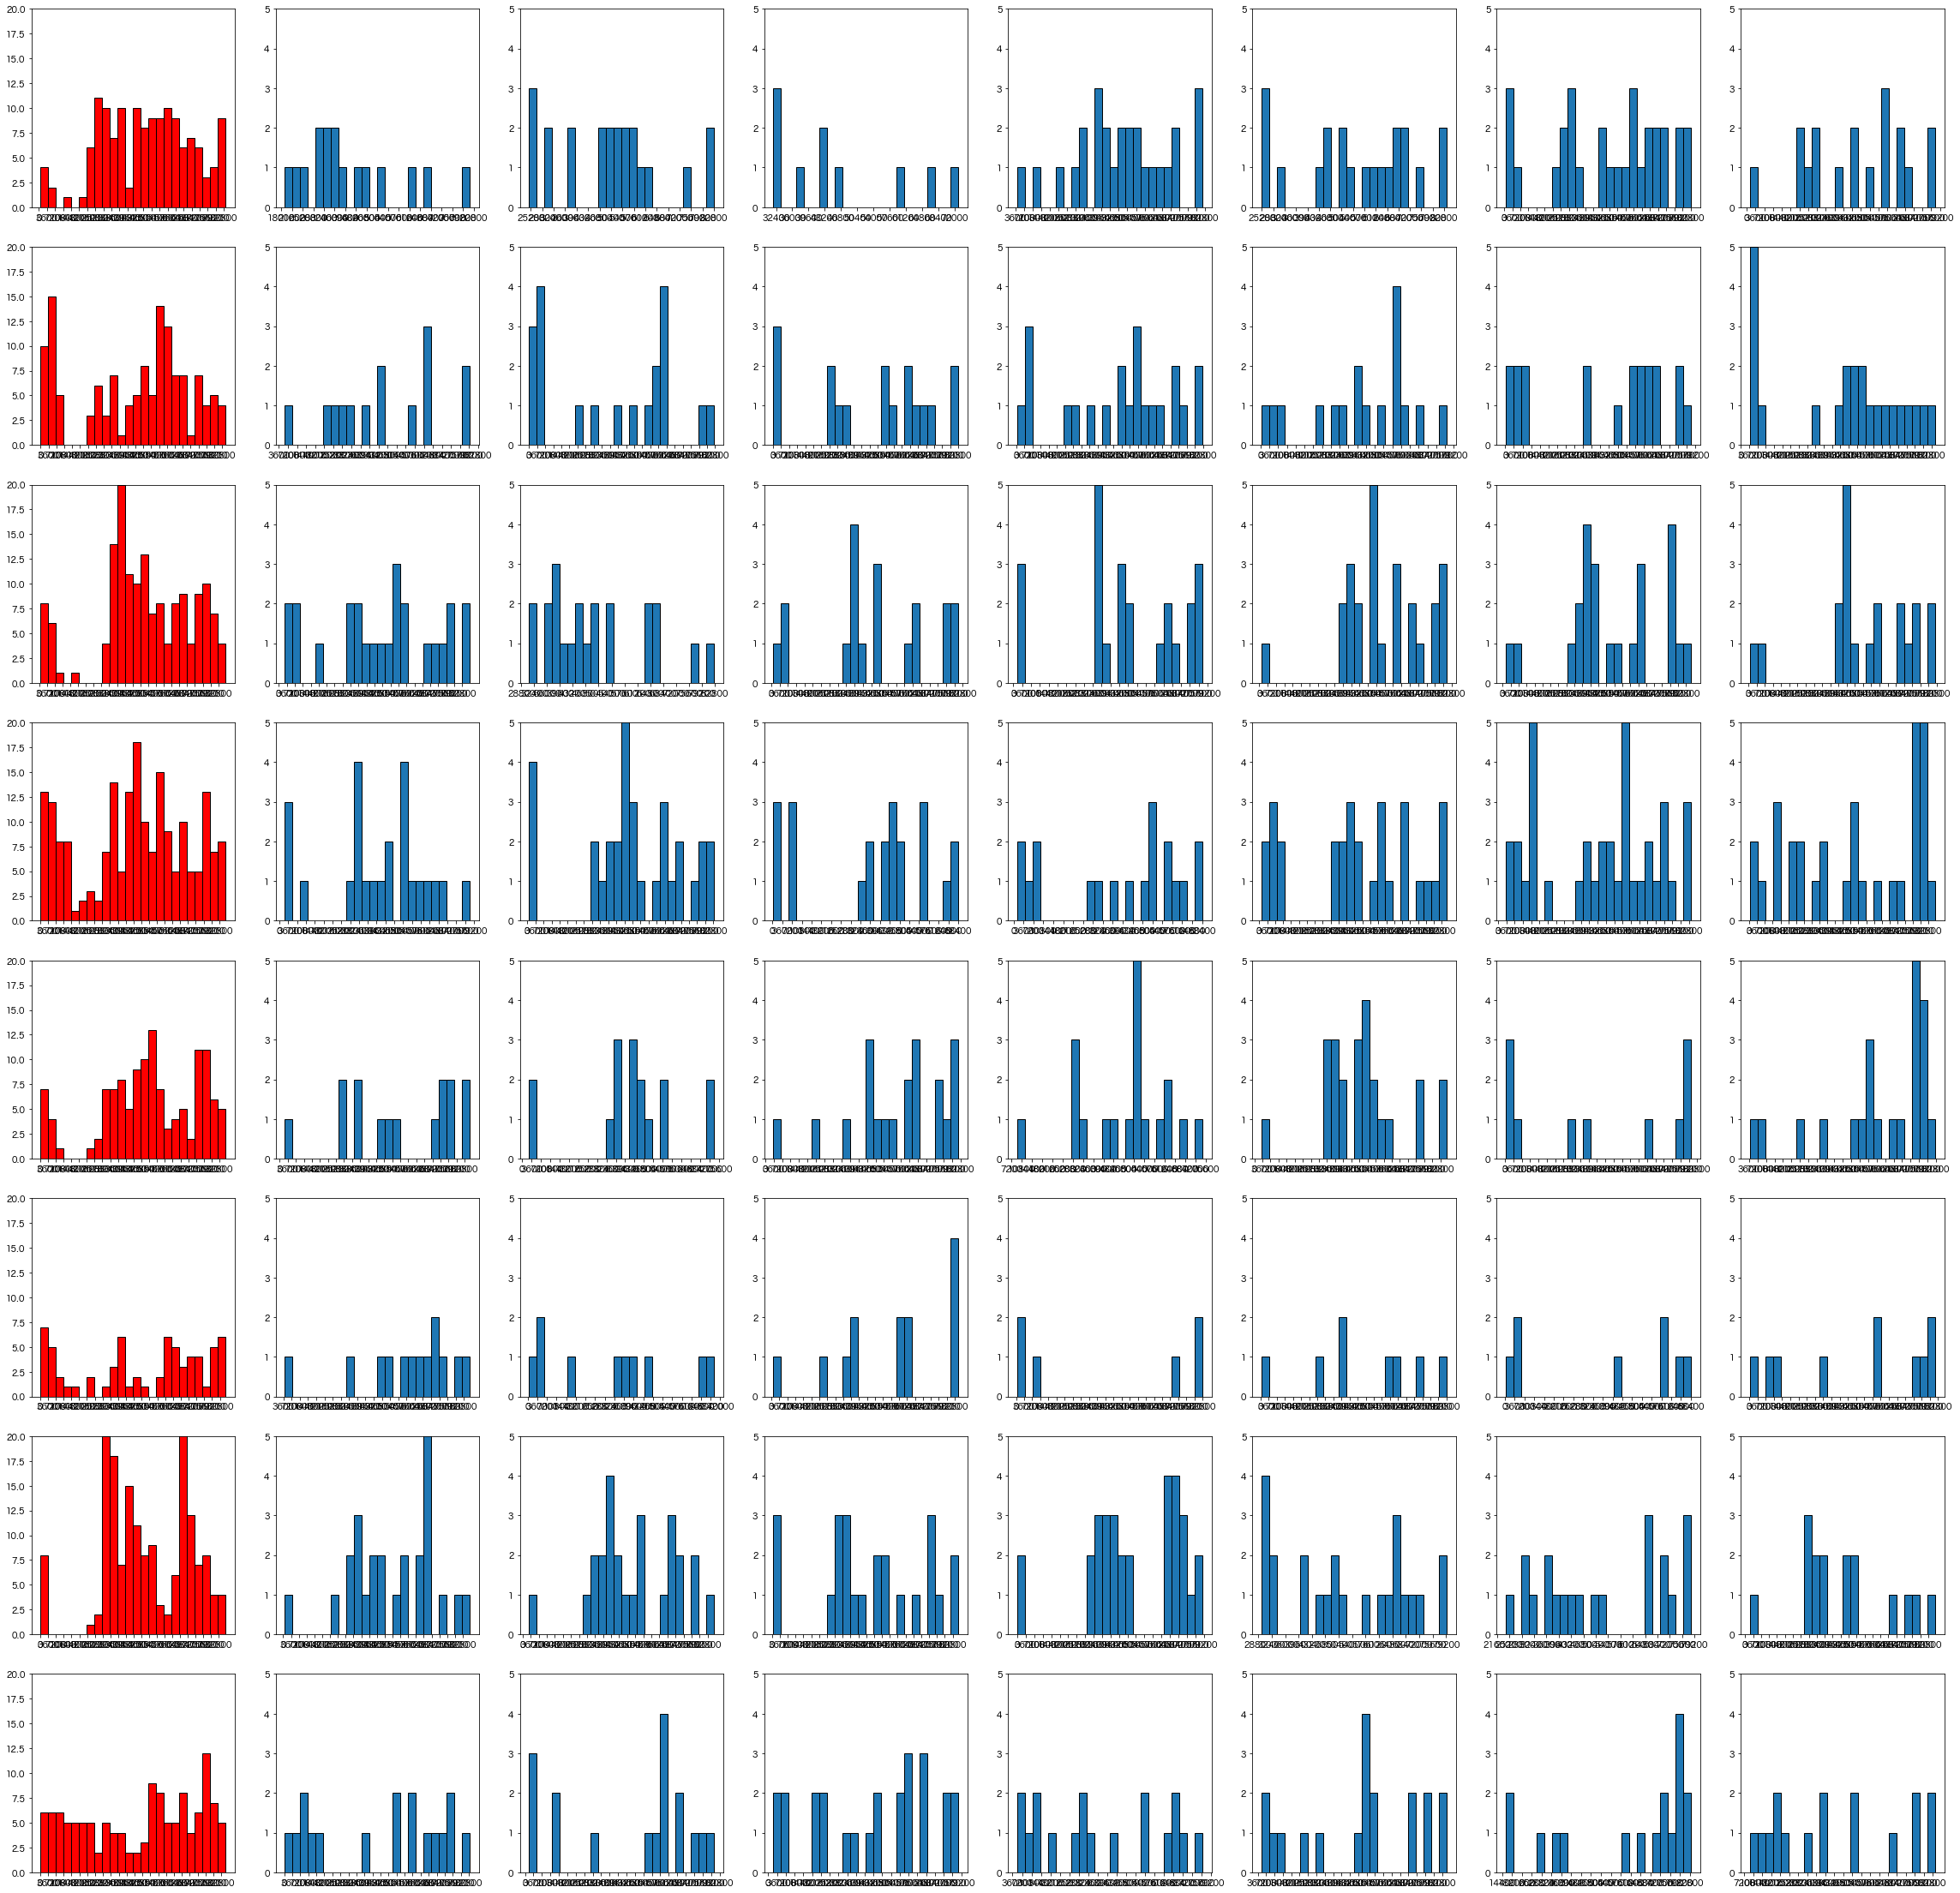

In [3]:
#hist plot - +weekday
plt.figure(figsize=(40,40))
# fuse_users = [x for x in range(0,8)]
x_range = np.arange(0,86400,3600)

for i in range(len(users)):
    plt.subplot(8,8,1+i*8)
    plt.xticks(x_range)
    plt.ylim(0,20)
    plt.hist(df.loc[(df["User"] == users[i]) & 
                    (df["state"] == "ON") & 
                    (df["date"] > dt.datetime(2021,12,1)) & 
                    (df["date"] < dt.datetime(2022,1,31))]["time_to_num"],
             bins=24,
             ec="black",
             color="red"
            )
    for j in range(0,7):
        plt.subplot(8,8,(j+2)+i*8)
        plt.xticks(x_range)
        plt.ylim(0,5)
        plt.hist(df.loc[(df["User"] == users[i]) & 
                        (df["state"] == "ON") & 
                        (df["date"] > dt.datetime(2021,12,1)) & 
                        (df["date"] < dt.datetime(2022,1,31)) &
                        (df["weekday"] == j)]["time_to_num"],
                 bins=24,
                 ec="black"
                )
# plt.savefig("bs_2_results/hist_plot_plus_weekday_time_mini.jpg")